# Clustering Crypto

In [81]:
# Initial imports
import pandas as pd
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Deliverable 1: Preprocessing the Data for PCA

In [107]:
# Load the crypto_data.csv dataset.
# Loading data
file_path = "crypto_data.csv"
crypto_df = pd.read_csv(file_path,index_col=0)
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [108]:
# Keep all the cryptocurrencies that are being traded.
crypto_df = crypto_df[crypto_df['IsTrading'] == True]
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [84]:
# Remove the "IsTrading" column. 
crypto_df = crypto_df.drop('IsTrading', axis=1)
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [85]:
# Remove rows that have at least 1 null value.
crypto_df = crypto_df.dropna()

In [109]:
# Keep the rows where coins are mined.
crypto_df = crypto_df[crypto_df['TotalCoinsMined'] > 0]
print(crypto_df.shape)
crypto_df.head(10)

(532, 6)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000
DASH,Dash,X11,True,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,True,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,True,PoW,1.133597e+08,210000000
ZEC,ZCash,Equihash,True,PoW,7.383056e+06,21000000


In [110]:
# Create a new DataFrame that holds only the cryptocurrencies names.
crypto_names_df = crypto_df[['CoinName']]
crypto_names_df.head(10)

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
LTC,Litecoin
DASH,Dash
XMR,Monero
ETC,Ethereum Classic
ZEC,ZCash


In [111]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df = crypto_df.drop('CoinName', axis=1)
crypto_df.head(10)

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,True,PoW/PoS,4.199995e+01,42
404,Scrypt,True,PoW/PoS,1.055185e+09,532000000
1337,X13,True,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethash,True,PoW,1.076842e+08,0
LTC,Scrypt,True,PoW,6.303924e+07,84000000
DASH,X11,True,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,True,PoW,1.720114e+07,0
ETC,Ethash,True,PoW,1.133597e+08,210000000
ZEC,Equihash,True,PoW,7.383056e+06,21000000


In [89]:
# Use get_dummies() to create variables for text features.
# create dummy variables for the Algorithm and ProofType columns
X = pd.get_dummies(data=crypto_df, columns=["Algorithm", "ProofType"])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
# Standardize the data with StandardScaler().
X_std = StandardScaler().fit_transform(X)
X_std

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

### Deliverable 2: Reducing Data Dimensions Using PCA

In [113]:
# Using PCA to reduce dimension to three principal components.
# Initialize PCA model
pca = PCA(n_components=3)
# Get two principal components for the iris data.
X_pca = pca.fit_transform(X_std)
X_pca

array([[-0.33997742,  1.03170834, -0.42931245],
       [-0.32331999,  1.03187572, -0.42959415],
       [ 2.3036658 ,  1.63358065, -0.52350738],
       ...,
       [ 0.32238142, -2.31678394,  0.28150728],
       [-0.15552471, -1.99505996,  0.3428818 ],
       [-0.29990848,  0.8515598 , -0.12635124]])

In [114]:
# Create a DataFrame with the three principal components.
pcs_df = pd.DataFrame(X_pca, columns=["PC 1", "PC 2", "PC 3"], index=crypto_names_df.index)
pcs_df.head(10)

,PC 1,PC 2,PC 3
42,-0.339977,1.031708,-0.429312
404,-0.323320,1.031876,-0.429594
1337,2.303666,1.633581,-0.523507
BTC,-0.144908,-1.327686,0.105366
ETH,-0.145062,-2.047139,0.219457
LTC,-0.171384,-1.124358,-0.002206
DASH,-0.376627,1.215344,-0.395920
XMR,-0.149626,-2.236914,0.288637
ETC,-0.143505,-2.047240,0.219443
ZEC,-0.155524,-1.995060,0.342882


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [115]:
# Create an elbow curve to find the best value for K.
inertia = []
k = list(range(1, 11))

In [116]:
# Looking for the best K
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

C:\Users\galgu\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



In [117]:
# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k, width=800, height=800,)

:Curve   [k]   (inertia)

Running K-Means with `k=4`

In [118]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)
predictions

array([0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0,

In [97]:
clustered_df = pd.concat([crypto_df,pcs_df],axis =1)
clustered_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.342056,1.045991,-0.480772
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.325417,1.046215,-0.481095
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.302010,1.654424,-0.548763
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.139125,-1.354779,0.151707
ETH,Ethash,PoW,1.076842e+08,0,-0.155984,-2.025155,0.335603
...,...,...,...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000,2.496003,0.730469,-0.237514
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000,-0.340105,1.045887,-0.480775
BDX,CryptoNight,PoW,9.802226e+08,1400222610,0.326209,-2.298240,0.404264
ZEN,Equihash,PoW,7.296538e+06,21000000,-0.128759,-2.092014,0.348246


In [98]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([crypto_df,pcs_df],axis =1)

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df['CoinName'] = crypto_names_df['CoinName']

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df['Class'] = model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.342056,1.045991,-0.480772,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.325417,1.046215,-0.481095,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.302010,1.654424,-0.548763,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.139125,-1.354779,0.151707,Bitcoin,2
ETH,Ethash,PoW,1.076842e+08,0,-0.155984,-2.025155,0.335603,Ethereum,2
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.170976,-1.121520,0.001363,Litecoin,2
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.399505,1.286039,-0.448552,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.153819,-2.206019,0.396765,Monero,2
ETC,Ethash,PoW,1.133597e+08,210000000,-0.154429,-2.025246,0.335603,Ethereum Classic,2
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.128758,-2.092014,0.348246,ZCash,2


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

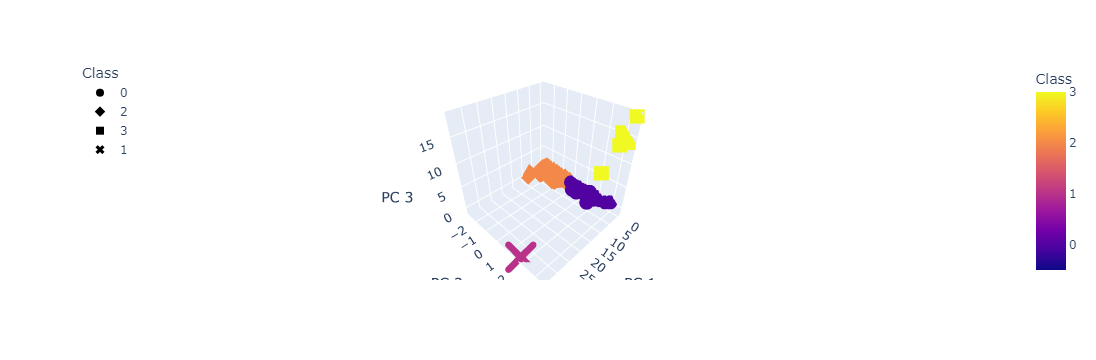

In [99]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(clustered_df, x="PC 1", y="PC 2", z="PC 3", color="Class", symbol="Class", hover_name='CoinName', hover_data=['Algorithm'], width=800)
fig.update_layout(legend=dict(x=0,y=1))
fig.show()

In [100]:
# Create a table with tradable cryptocurrencies.
clustered_df.hvplot.table(sortable=True, selectable=True)

:Table   [Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class]

In [101]:
# Print the total number of tradable cryptocurrencies.
print(f"The total number of tradable cryptocurrencies is: {clustered_df['Algorithm'].count()}.")

The total number of tradable cryptocurrencies is: 532.


In [102]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
scaled =MinMaxScaler().fit_transform(clustered_df[["TotalCoinSupply","TotalCoinsMined"]])
scaled

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [103]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(data=scaled, columns=["TotalCoinSupply","TotalCoinsMined"], index = clustered_df.index)

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df['CoinName'] = clustered_df['CoinName']

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df['Class'] = clustered_df['Class']

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,0
404,5.320000e-04,0.001066,404Coin,0
1337,3.141593e-01,0.029576,EliteCoin,0
BTC,2.100000e-05,0.000018,Bitcoin,2
ETH,0.000000e+00,0.000109,Ethereum,2
LTC,8.400000e-05,0.000064,Litecoin,2
DASH,2.200000e-05,0.000009,Dash,0
XMR,0.000000e+00,0.000017,Monero,2
ETC,2.100000e-04,0.000115,Ethereum Classic,2
ZEC,2.100000e-05,0.000007,ZCash,2


In [104]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(x="TotalCoinsMined", y="TotalCoinSupply", by="Class", hover_cols = ["CoinName"])

:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)